# Heart Failure Prediction Project                

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C://Users\gupta.LAPTOP-4NJ629H5\OneDrive\Documents\heart_failure_data project.csv")


In [3]:
df.head()  #initial top 5 data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.tail()  #bottom 5 data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
df.columns  #accesing all columns name

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.describe()    #summarizes the count ,mean,standard deviation, min, and max for numeric variable

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.info()   #info -> which tells what type of data is being stored in the df for the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.shape  #its show how many rows and columns

(918, 12)

In [9]:
df.nunique(axis=0)    #returns the number of unique values for each variable.


Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [10]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [11]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [12]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [13]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [14]:
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [15]:
#values count

df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [16]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [17]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [18]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [19]:
df['HeartDisease'].value_counts()  

1    508
0    410
Name: HeartDisease, dtype: int64

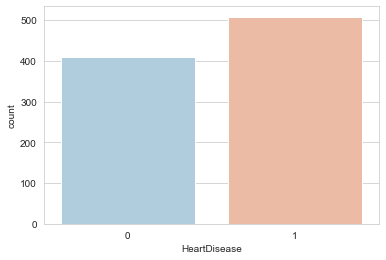

In [20]:
sns.set_style("whitegrid")
sns.countplot(x='HeartDisease',data=df,palette='RdBu_r')
plt.show()


In [21]:
count_no=len(df[df['HeartDisease']==0])
count_yes=len(df[df['HeartDisease']==1])

In [22]:
print(count_no)
print(count_yes)

410
508


In [23]:
no_percent= count_no/(count_no+count_yes)*100
print(no_percent)

44.66230936819172


In [24]:
yes_percent= count_yes/(count_no+count_yes)*100
print(yes_percent)

55.33769063180828


In [25]:
df.groupby('HeartDisease').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


<AxesSubplot:ylabel='None'>

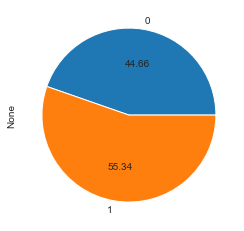

In [26]:
df.groupby('HeartDisease').size().plot(kind='pie',autopct='%.2f')


In [27]:
df.groupby('ChestPainType').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
ChestPainType,,,,,,,
ASY,54.959677,133.229839,186.645161,0.284274,128.477823,1.162702,0.790323
ATA,49.242775,130.624277,233.046243,0.109827,150.208092,0.307514,0.138728
NAP,53.310345,130.960591,197.438424,0.201970,143.236453,0.674877,0.354680
TA,54.826087,136.413043,207.065217,0.282609,147.891304,1.036957,0.434783


<AxesSubplot:ylabel='None'>

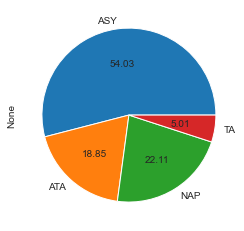

In [28]:
df.groupby('ChestPainType').size().plot(kind='pie',autopct='%.2f')

In [29]:
df.groupby('RestingECG').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
RestingECG,,,,,,,
LVH,56.218085,134.335106,236.946809,0.223404,143.117021,1.069681,0.563830
Normal,51.740942,130.635870,195.375000,0.201087,137.302536,0.786051,0.516304
ST,56.140449,135.808989,169.129213,0.342697,128.617978,1.008989,0.657303


<AxesSubplot:ylabel='None'>

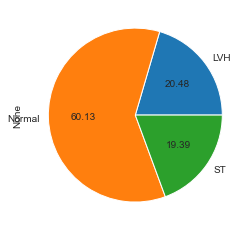

In [30]:
df.groupby('RestingECG').size().plot(kind='pie',autopct='%.2f')

In [31]:
df.groupby('ExerciseAngina').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
ExerciseAngina,,,,,,,
N,51.835466,130.032907,201.875686,0.212066,144.572212,0.528519,0.351005
Y,55.981132,135.881402,194.264151,0.264151,125.363881,1.416442,0.851752


<AxesSubplot:ylabel='None'>

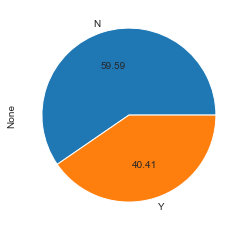

In [32]:
df.groupby('ExerciseAngina').size().plot(kind='pie',autopct='%.2f',)

In [33]:
df.groupby('ST_Slope').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
ST_Slope,,,,,,,
Down,58.317460,131.857143,165.222222,0.396825,129.936508,2.152381,0.777778
Flat,55.256522,134.228261,193.241304,0.278261,128.110870,1.188696,0.828261
Up,50.711392,130.349367,210.627848,0.154430,148.035443,0.334684,0.197468


<AxesSubplot:ylabel='None'>

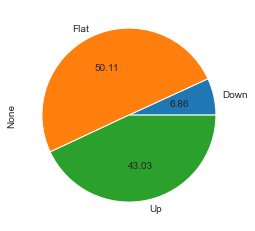

In [34]:
df.groupby('ST_Slope').size().plot(kind='pie',autopct='%.2f')

we observe that the dataset is balanced

Text(0, 0.5, 'Response Frequency')

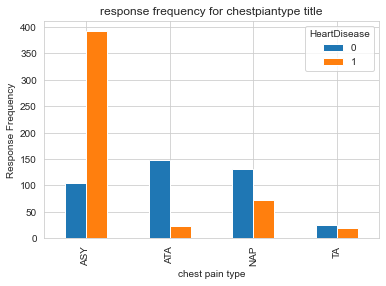

In [35]:
pd.crosstab(df.ChestPainType,df.HeartDisease).plot(kind='bar')
plt.title('response frequency for chestpiantype title')
plt.xlabel('chest pain type')
plt.ylabel('Response Frequency')

Text(0, 0.5, 'Response Frequency')

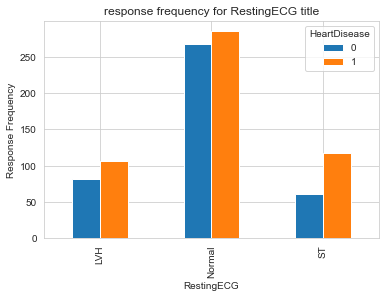

In [36]:
pd.crosstab(df.RestingECG,df.HeartDisease).plot(kind='bar')
plt.title('response frequency for RestingECG title')
plt.xlabel('RestingECG')
plt.ylabel('Response Frequency')

Text(0, 0.5, 'Response Frequency')

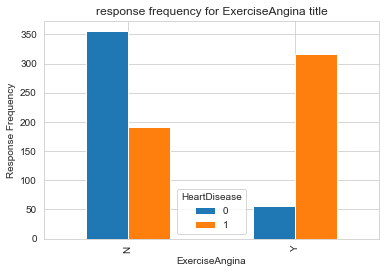

In [37]:
pd.crosstab(df.ExerciseAngina,df.HeartDisease).plot(kind='bar')
plt.title('response frequency for ExerciseAngina title')
plt.xlabel('ExerciseAngina')
plt.ylabel('Response Frequency')

Text(0, 0.5, 'Response Frequency')

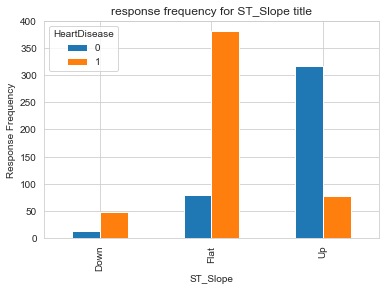

In [38]:
pd.crosstab(df.ST_Slope,df.HeartDisease).plot(kind='bar')
plt.title('response frequency for ST_Slope title')
plt.xlabel('ST_Slope')
plt.ylabel('Response Frequency')

Text(0, 0.5, 'Frequency')

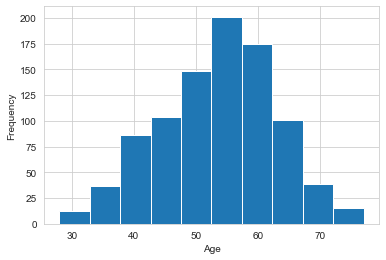

In [39]:
df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')

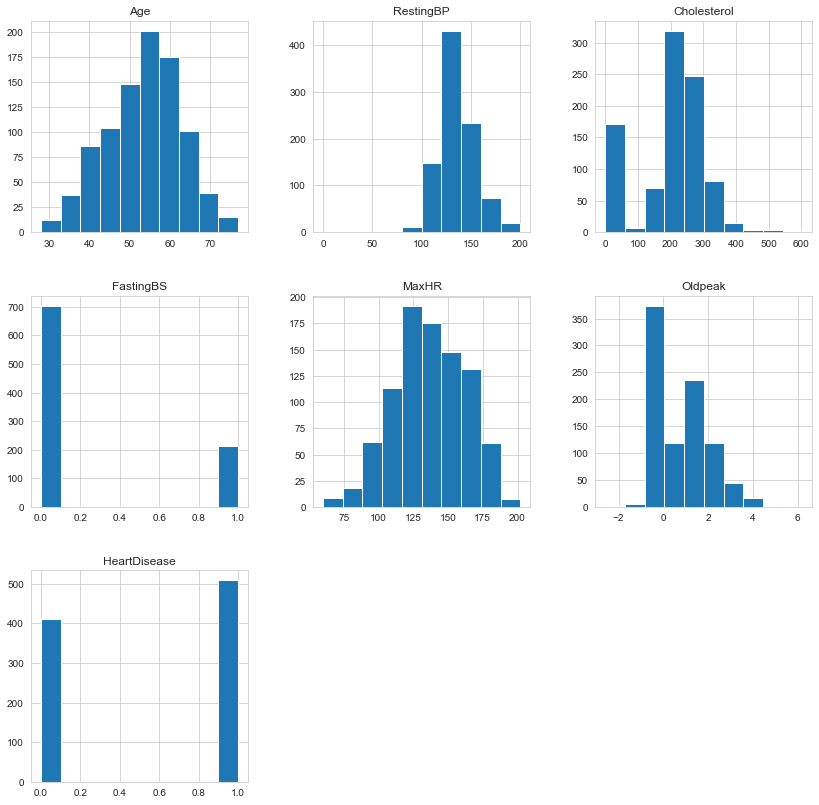

In [40]:
df.hist(figsize=(14,14))
plt.show()

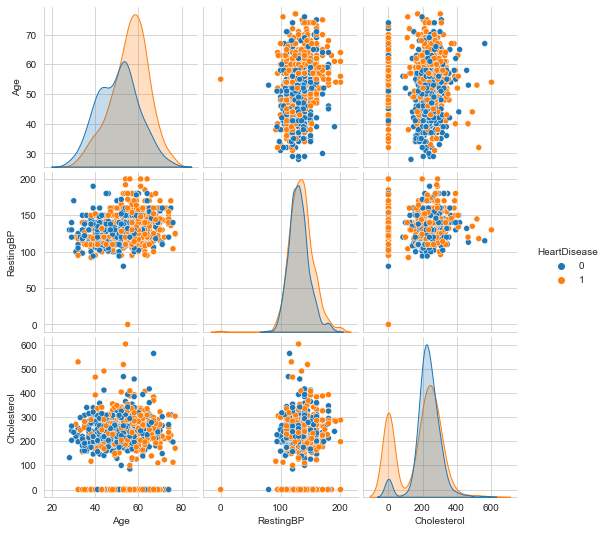

In [41]:
sns.pairplot(df,hue='HeartDisease',vars= ['Age','RestingBP','Cholesterol'])


From the above plot it is clear that as the age increases chances of heart disease increases




<AxesSubplot:xlabel='MaxHR', ylabel='Age'>

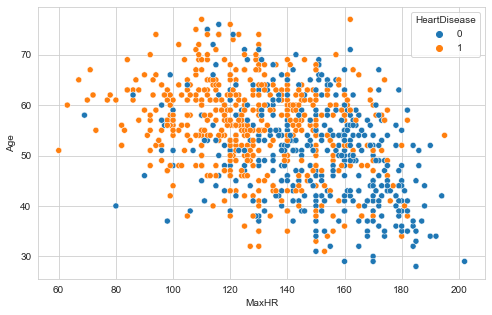

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='MaxHR', y='Age', hue='HeartDisease')

Low heart rate induces heart disease, mainly affecting older people

In [43]:
df.isna().sum()    #Display the null value if any

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

let us check the correlation coefficients between the numerical features of the patients and the target column HeartDisease:

In [44]:
corr=df.corr()             #its show correlation
corr['HeartDisease']


Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

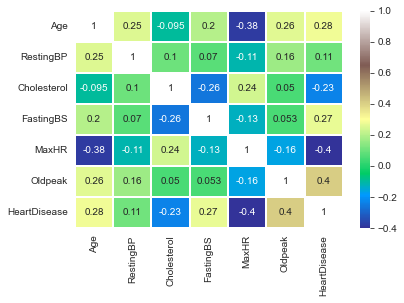

In [45]:
#create a correlation heatmap
dataplot=sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)

#displaying heatmap
plt.show()


we observe that all numerical feature are strongly coorelated with the existence of heart disease




In [46]:
#After explorinng the dataset, I observe that i need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.


In [47]:
df = pd.get_dummies(df,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

Now all our features are numerical

In [48]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


.
we will need to scale our data. We choose to scale the features Age, RestingBP, Cholesterol, MaxHR and Oldpeak, since they are orders of magnitude away from 1.

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']] = scaler.fit_transform(df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,0,1,0,1,0,1,0,0,0,1


Now the data is scaled, we perform the train test split procedure:

In [50]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [51]:
cols=df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak','Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']]
X=cols
y=df['HeartDisease']

In [52]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,1,1,0,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,1,1,0,0,0,1,0,0,1
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,0,-0.188999,0.293283,1,0,0,1,1,0,0,1,0
914,1.536902,0.627078,-0.053049,1,0.164684,2.357094,1,0,0,0,1,0,0,1,0
915,0.370100,-0.129513,-0.620168,0,-0.857069,0.293283,1,0,0,0,1,0,1,1,0
916,0.370100,-0.129513,0.340275,0,1.461525,-0.832432,0,1,0,0,0,0,0,1,0


In [53]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)

# Logistic Regression Algorithm

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [56]:
log_reg=LogisticRegression(max_iter=1000)

In [57]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [58]:
log_pred= log_reg.predict(X_test)
print('Accuracy {:.2f}'.format(log_reg.score(X_test,y_test)))

Accuracy 0.92


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,log_pred)
print(confusion_matrix)

[[ 67   6]
 [  9 102]]


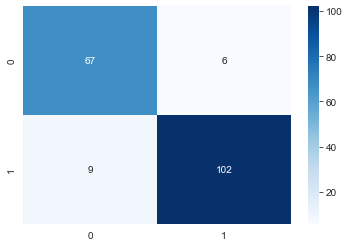

In [60]:
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues');


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        73
           1       0.94      0.92      0.93       111

    accuracy                           0.92       184
   macro avg       0.91      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



#  Random forest algorithm

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_model=RandomForestClassifier(n_estimators=200,random_state=1)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=1)

In [64]:
rf_pred=rf_model.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
print('Model accuracy score is {0:0.4f}'.format(accuracy_score(y_test,rf_pred)))

Model accuracy score is 0.9022


[[ 66   7]
 [ 11 100]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        73
           1       0.93      0.90      0.92       111

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



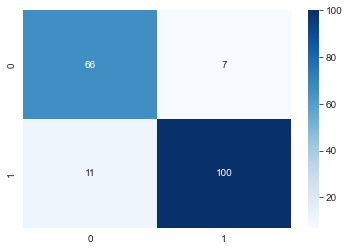

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,rf_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues');

print(classification_report(y_test,rf_pred))

# Decision  Tree Algorithm

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
gini_res= DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)
gini_res.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [69]:
dt_pred=gini_res.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with gini index is {0:0.4f}'.format(accuracy_score(y_test,dt_pred)))

Model accuracy score with gini index is 0.8533


In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,dt_pred)
print(confusion_matrix)


[[65  8]
 [19 92]]


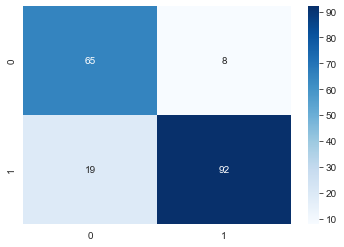

In [72]:
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues');


In [73]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        73
           1       0.92      0.83      0.87       111

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



# KNN Algorithm

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
#We create our KNN model with K=1:

KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [76]:
KNN_pred = KNN_model.predict(X_test)

In [77]:
print('Accuracy {:.2f}'.format(KNN_model.score(X_test,y_test)))

Accuracy 0.82


In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,KNN_pred)
print(confusion_matrix)

[[58 15]
 [19 92]]


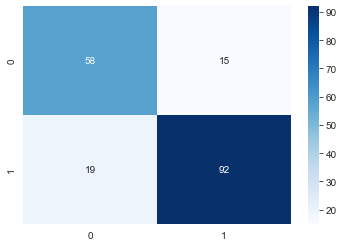

In [79]:
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues');


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,KNN_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        73
           1       0.86      0.83      0.84       111

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



We observe a number of 19 FN predictions and an accuracy of 0.82. Let us try to optimize the KNN model by finding the best K value. This can be found using the elbow method .

In [81]:
error_rate = []

for i in range(1,40):
    
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train,y_train)
    pred_i = KNN_model.predict(X_test)
    error_rate.append(np.mean(pred_i!= y_test))

Text(0, 0.5, 'Error Rate')

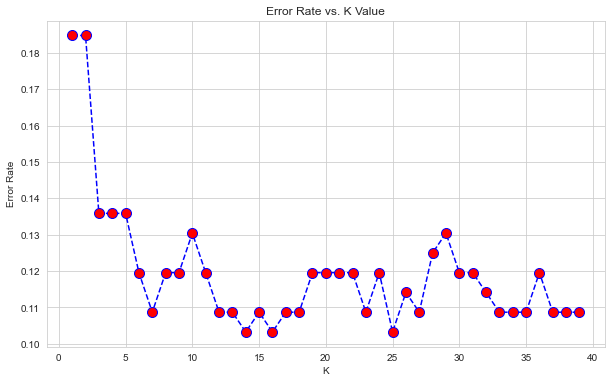

In [82]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We observe that the errors are quite small (probably due to the fact that the size of the sample is big enough). The value K=14 has the lowest error, so we will use it

In [83]:
KNN_model = KNeighborsClassifier(n_neighbors=14)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [84]:
KNN_pred = KNN_model.predict(X_test)

In [85]:
print('Accuracy {:.2f}'.format(KNN_model.score(X_test,y_test)))

Accuracy 0.90


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,KNN_pred)
print(confusion_matrix)

[[66  7]
 [12 99]]


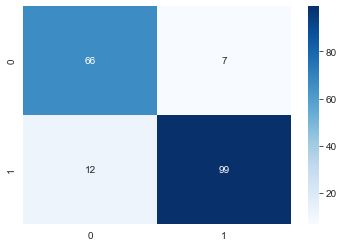

In [87]:
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues');


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,KNN_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        73
           1       0.93      0.89      0.91       111

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



We see that our model is now better than before.

# SVM Algorithm

In [89]:
from sklearn import svm


In [90]:
svm_model= svm.SVC(kernel='rbf')
svm_model.fit(X_train,y_train)

SVC()

In [91]:
svm_pred = svm_model.predict(X_test)

In [92]:
svm_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [93]:
print('Accuracy {:.2f}'.format(svm_model.score(X_test,y_test)))

Accuracy 0.91


In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,svm_pred)
print(confusion_matrix)

[[ 65   8]
 [  9 102]]


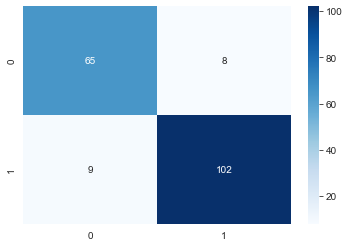

In [95]:
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues');


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        73
           1       0.93      0.92      0.92       111

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184

